In [1]:
import matplotlib.pyplot as plt
import numpy as np
from shurigin_algorithm import shurigin_algorithm_debug

# Алгоритм Шурыгина

Рассмотрим алгоритм Шурыгина. Описание алгоритма есть [здесь](https://github.com/Dyakonov/PZAD/blob/master/PZAD2018_01_probweights_06.pdf)

Будем моделировать равномерное распределение и наблюдать за сходимостью алгоритма. При этом будем добавлять равномерный шум с различными параметрами

Алгоритм Шурыгина: 0.696719, Среднее: 11.977078


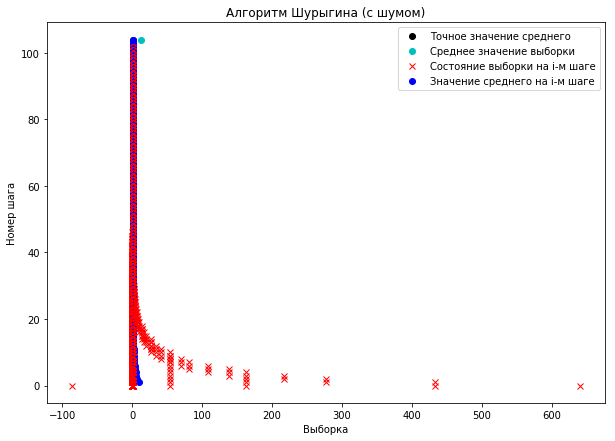

In [2]:
n = 100
variance = 1000
shift = 0.1
seed = 12
n_noise = 5
np.random.seed(seed)
noise = (np.random.rand(n_noise) - shift) * variance
xlim = []
mean, s_mean = shurigin_algorithm_debug(np.random.rand(n), draw=True, noise=noise, xlim=xlim)
plt.title('Алгоритм Шурыгина (с шумом)')
print('Алгоритм Шурыгина: %f, Среднее: %f' % (s_mean, mean))

Как видим, при наличии 5% шума, можем иметь хорошую оценку среднего.

Будем моделировать равномерное распределение и наблюдать за сходимостью алгоритма. Шум добавлять не будем. Эксперименты показывают, что алгоритм сходится к среднему

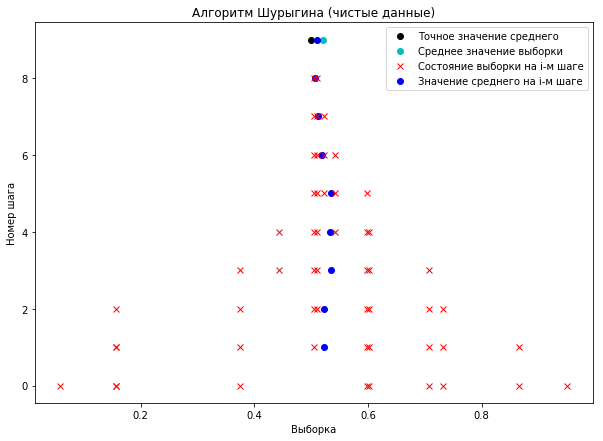

In [3]:
np.random.seed(42)
shurigin_algorithm_debug(np.random.rand(10), draw=True)
plt.title('Алгоритм Шурыгина (чистые данные)');

Проведём эксперименты на предмет устойчивости к шуму. Будем брать равномерный шум на интервале `[-200; 800]`. Построим зависимость числа шумовых точек от величины среднего. Как можно наблюдать, при увеличении числа шумовых точек, значение среднего растёт. Растёт и значение для алгоритма Шурыгина. При малых долях шумовых точек, ошибка растёт как $err(p) = 0.1p$, где $p$ -- число шумовых точек

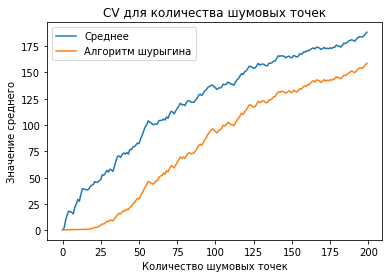

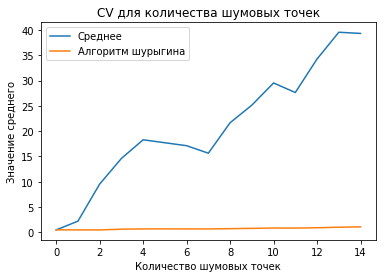

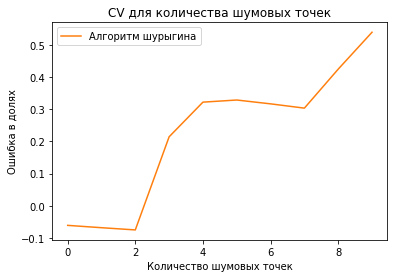

In [4]:
count_experiments = 40
n = 100
variance = 1000
shift = 0.2
seed = 42
mean = []
s_mean = []
for n_noise in range(0, 2 * n):
    mean_m = []
    s_mean_m = []
    for i in range(count_experiments):
        np.random.seed(seed)
        noise = (np.random.rand(n_noise) - shift) * variance
        xlim = []
        mean_, s_mean_ = shurigin_algorithm_debug(np.random.rand(n), draw=False, noise=noise)
        mean_m.append(mean_)
        s_mean_m.append(s_mean_)
    mean.append(np.mean(mean_m))
    s_mean.append(np.mean(s_mean_m))
plt.figure()
plt.plot(mean)
plt.plot(s_mean)
plt.title('CV для количества шумовых точек')
plt.xlabel('Количество шумовых точек')
plt.ylabel('Значение среднего')
plt.legend(['Среднее', 'Алгоритм шурыгина'])
plt.figure()
plt.plot(mean[:15])
plt.plot(s_mean[:15])
plt.title('CV для количества шумовых точек')
plt.xlabel('Количество шумовых точек')
plt.ylabel('Значение среднего')
plt.legend(['Среднее', 'Алгоритм шурыгина'])
plt.figure()
plt.plot((np.array(s_mean[:10]) - 0.5) / 0.5, color='C1')
plt.title('CV для количества шумовых точек')
plt.xlabel('Количество шумовых точек')
plt.ylabel('Ошибка в долях')
plt.legend(['Алгоритм шурыгина']);

Следует отметить, что алгоритм по-прежнему продолжает сходиться при "правых" и "левых" выбросах. 

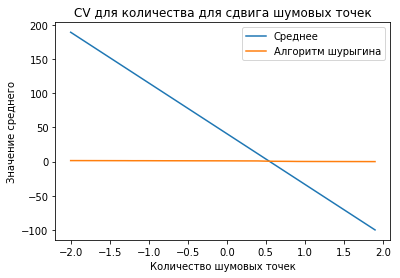

In [5]:
count_experiments = 40
n = 100
variance = 1000
shift = 0.2
n_noise = 8
seed = i
mean = []
s_mean = []
for shift in np.arange(-2, 2, 0.1):
    mean_m = []
    s_mean_m = []
    for i in range(count_experiments):
        np.random.seed(seed)
        noise = (np.random.rand(n_noise) - shift) * variance
        xlim = []
        mean_, s_mean_ = shurigin_algorithm_debug(np.random.rand(n), draw=False, noise=noise)
        mean_m.append(mean_)
        s_mean_m.append(s_mean_)
    mean.append(np.mean(mean_m))
    s_mean.append(np.mean(s_mean_m))
plt.figure()
plt.plot(np.arange(-2, 2, 0.1), mean)
plt.plot(np.arange(-2, 2, 0.1), s_mean)
plt.title('CV для количества для сдвига шумовых точек')
plt.xlabel('Количество шумовых точек')
plt.ylabel('Значение среднего')
plt.legend(['Среднее', 'Алгоритм шурыгина']);

**Замечание**. Отметим, что алгоритм плохо обобщается на многомерный случай. При этом, при решении задач, его можно использовать как детектор аномалий: если значение среднего сильно отличается от результата работы алгоритма Шурыгина, то необходима чистка данных.